In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time

from sklearn.datasets import make_gaussian_quantiles, make_moons, make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

## Make Dataset

우선 SVM에 대해 직관적으로 이해하기 위해, 결정 경계를 시각화 할 수 있는 2차원의 분류 데이터를 생성해보겠습니다.

In [2]:
X_moon, y_moon = make_moons(n_samples=500, noise=0.1, random_state=0)
X, y = make_classification(n_samples=600, n_features=2, n_clusters_per_class = 1, 
                           n_classes=3, n_redundant=0, n_informative=2, class_sep = 1.2, flip_y = 0,
                           shuffle=True, random_state=6)
X2, y2 = make_classification(n_samples=600, n_features=2, n_clusters_per_class = 1,
                           n_classes=3, n_redundant=0, n_informative=2, class_sep = 3, flip_y=0,
                           shuffle=True, random_state=6)

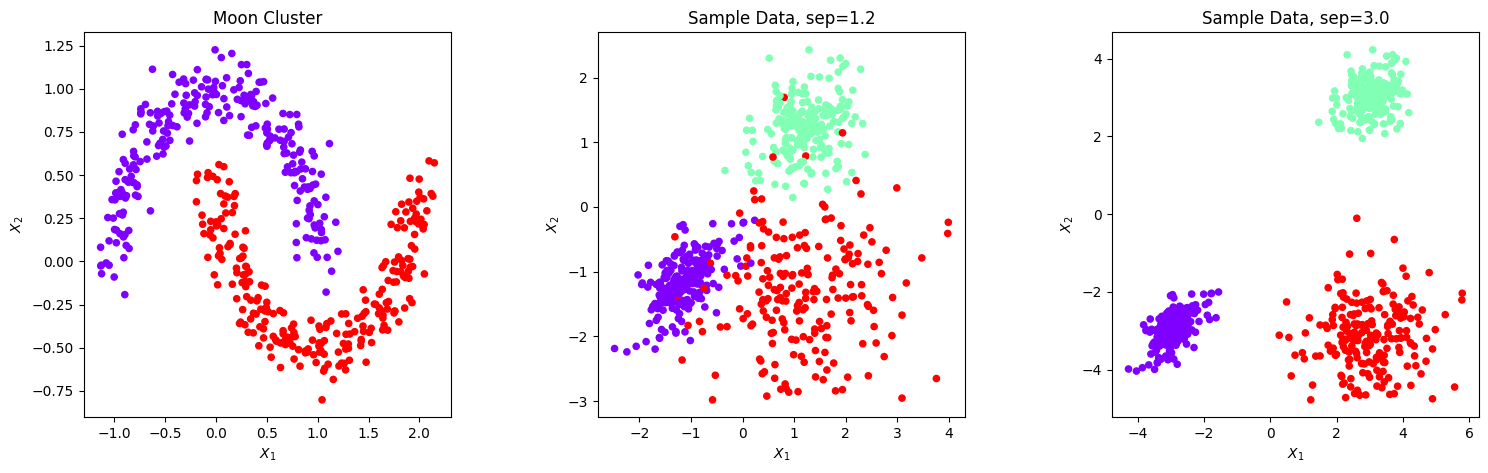

In [3]:
titles = ['Moon Cluster',
          'Sample Data, sep=1.2',
          'Sample Data, sep=3.0']
plt.figure(figsize=(18, 5)) 
for i, Xs in enumerate(([X_moon, y_moon], [X, y], [X2,y2])):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)
    
    plt.title(titles[i])
    plt.scatter(Xs[0][:,0], Xs[0][:,1], marker='o', c=Xs[1], s=20, cmap=plt.cm.rainbow)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

*sklearn* 패키지에서 제공하는 데이터 생성 함수를 활용하여 데이터 셋을 생성했습니다. 

* **make_moon** : 달 모양의 2개 군집을 가지는 데이터를 생성하는 명령어입니다. 비선형적인 구조를 가지고 있어 선형 분류 방법으로는 좋은 성능의 분류가 되지 않습니다.

* **make_classification** : 여러 파라미터들을 조정하여 사용자가 원하는 속성의 분류 데이터를 만들 수 있는 함수입니다. 3개 이상의 클래스에 대한 분류 경계면 생성을 살펴보기 위해 클래스를 3개로 구성 했습니다.  
더해서 *class_sep* 이라는 파라미터를 다르게 하여 2개의 데이터셋을 생성했습니다. 위와 같이 *class_sep*의 값이 높을수록 각 클래스 간 거리가 멀어져 분류가 더 쉬워집니다. *class_sep*을 0.8로 설정한 경우 선형 분류가 가능한 데이터가 생성 되었습니다.

## SVM

이제 생성한 데이터를 활용, 여러 커널을 사용하여 결정 경계를 그려보아 각 커널의 차이점을 직관적으로 살펴보겠습니다.  
linear, polynomial, rbf의 3개 커널을 사용하였습니다.

**Linear Kernel**의 경우 선형으로 분류 경계를 그리게 됩니다. 

$K(X_i, X_j) = {X_i}^T \cdot X_j$

**Polynomial Kernel**의 경우 원 데이터의 차원을 더 고차원의 다항식으로 맵핑하는 커널입니다. 

$K(X_i, X_j) = (\gamma {X_i}^T \cdot X_j + \text{coef0})^{\text{degree}}$

**RBF Kernel** 역시 마찬가지로 더 고차원으로 맵핑하는 커널입니다. 이론적으로, RBF커널의 경우 무한 차원으로의 맵핑이 가능하다고 알려져 있습니다. 

$K(X_i,X_j) = \exp\left(-\gamma\lVert(X_i-X_j)\rVert^2\right)$

Decision Boundary 그리기 코드 참고 : https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

### Moon

In [4]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X_moon, y_moon)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_moon, y_moon)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_moon, y_moon)

3개 커널로 모델을 생성하였습니다. 하이퍼파라미터의 경우 뒤에서 더 자세히 다뤄보도록 하겠습니다.

In [5]:
h = .01 
x_min, x_max = X_moon[:, 0].min() - 1, X_moon[:, 0].max() + 1
y_min, y_max = X_moon[:, 1].min() - 1, X_moon[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

결정 경계면을 그리기 위한 코드입니다. 데이터의 최소값과 최대값의 range를 모두 포함하는 범위에서 작은 단위의 grid를 만들어 각각의 영역에 대한 예측 결과를 추정하는 식으로 결정 경계면을 그리게 됩니다.

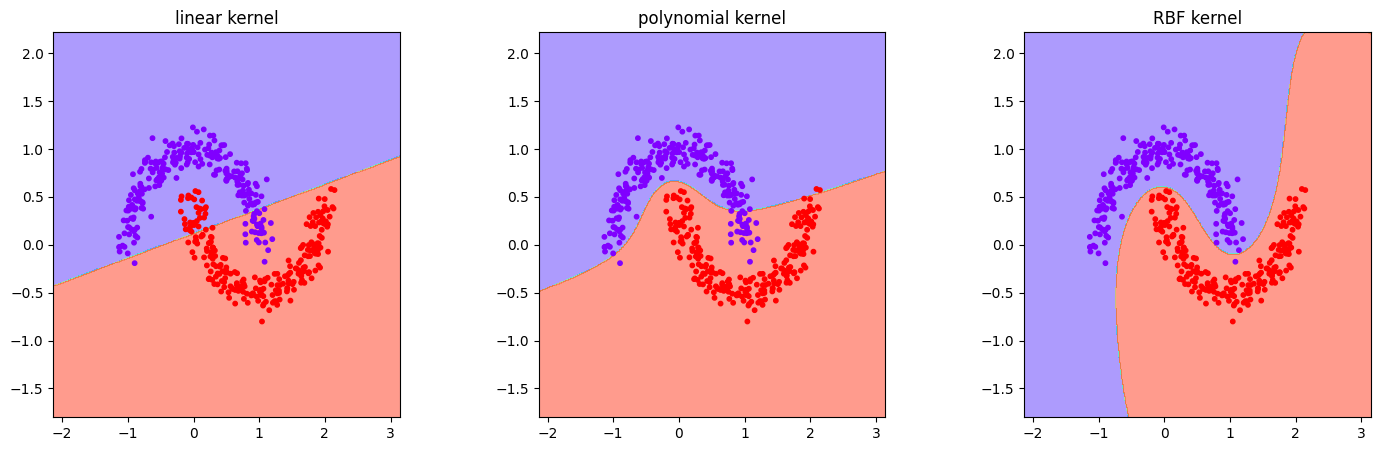

In [6]:
titles = ['linear kernel',
          'polynomial kernel',
          'RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.5)
    plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

**Linear Kernel**의 경우 데이터의 분포를 잘 반영하지 못 하고 선형으로 분류 경계면을 그리는 모습을 확인 할 수 있습니다. 이러한 문제를 해결하기 위해 Kernel이 필요합니다.

**Polynomial Kernel**의 경우 Linear Kernel보다는 상대적으로 낫지만, 중앙 부분의 분포를 반영하고 있지는 못 합니다.

**RBF Kernel**의 경우 달 모양의 데이터의 분포를 굉장히 잘 반영하고 있습니다.

### Sample Data, sep=0.8

In [7]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

In [8]:
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

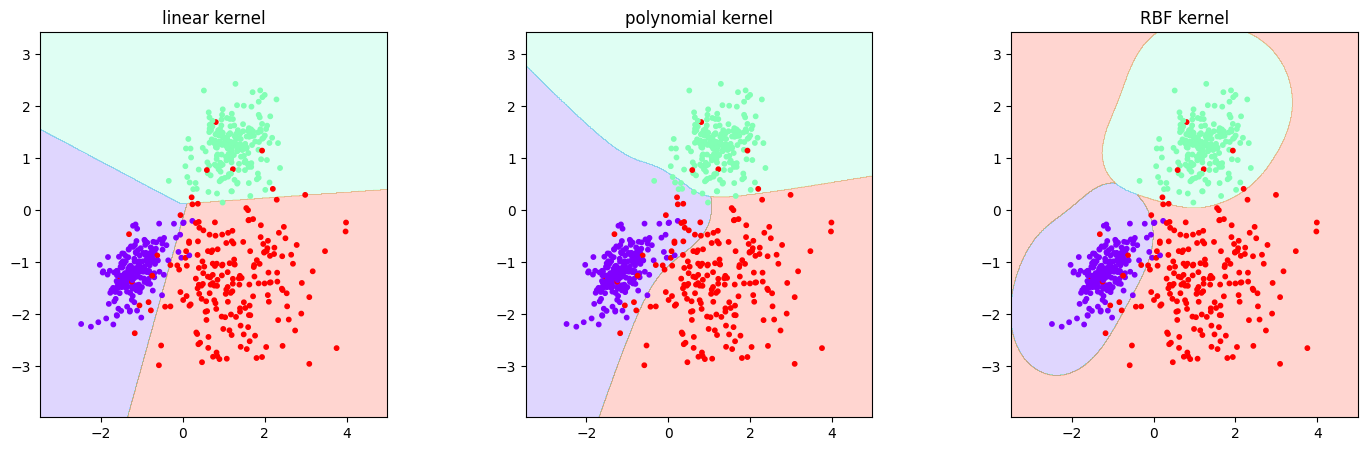

In [9]:
titles = ['linear kernel',
          'polynomial kernel',
          'RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

위 데이터의 경우 랜덤하게 생성된 3개의 군집이 어느정도 겹쳐져 있는 데이터입니다. 

**Linear Kernel** 및 **Polynomial Kernel**의 경우 전체 영역을 3개로 나누고 있는 반면, **RBF Kernel**의 경우 초록색 및 파란색 클래스의 경우 영역을 좁게 잡고 분포가 더 넓은 빨간색 클래스의 영역이 대부분을 차지하도록 결정 경계가 학습 되었습니다.

어느게 더 나은 결과인지는 데이터의 특성에 따라 다를 수 있으나, **Linear Kernel** 및 **Polynomial Kernel**이 일반화 성능이 더 좋을 것으로 보입니다.

### Sample Data, sep=2

In [10]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X2, y2)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X2, y2)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X2, y2)

In [11]:
h = .01  
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

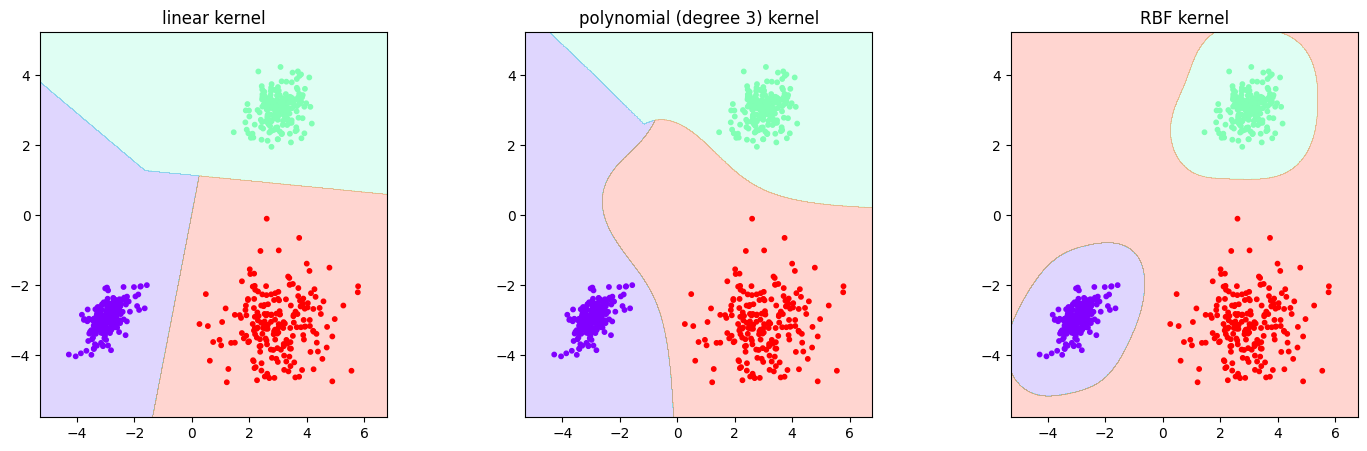

In [12]:
titles = ['linear kernel',
          'polynomial (degree 3) kernel',
          'RBF kernel']
plt.figure(figsize=(17, 5)) 
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.rainbow, s=10)
    plt.title(titles[i])

앞서 살펴 본 데이터와 마찬가지이지만, 클래스끼리의 거리가 더 멀어진 형태로 분포가 되어 있습니다. 따라서 선형적으로도 완벽하게 구분이 가능한 데이터라고 볼 수 있습니다.

위와 마찬가지로 **Linear Kernel** 및 **Polynomial Kernel**의 경우 전체 영역을 3개로 나누고 있는 반면, RBF의 경우 분포가 더 넓은 빨간색 클래스의 영역이 대부분을 차지하도록 결정 경계가 학습 되었습니다.

이 경우 **Linear Kernel** 혹은 **Polynomial Kernel**의 결정 경계가 더 합리적으로 보입니다.

## Hyper parameter (C, degree, gamma)

SVM의 각 커널에는 서로 다른 하이퍼 파라미터가 존재합니다. 조정 가능한 하이퍼파라미터는 다음과 같습니다. C의 경우 SVM 알고리즘 자체의 파라미터이고, 나머지 파라미터는 커널의 파라미터라고 이해 할 수 있습니다.

**Linear Kernel** : $K(X_i, X_j) = {X_i}^T \cdot X_j$

**Polynomial Kernel** : $K(X_i, X_j) = (\gamma {X_i}^T \cdot X_j + \text{coef0})^{\text{degree}}$

**RBF Kernel** : $K(X_i,X_j) = \exp\left(-\gamma\lVert(X_i-X_j)\rVert^2\right)$

* linear = C
* polynomial = C, $\gamma$, degree, coef0
* rbf : C, $\gamma$

**C**가 크면 에러에 대해 더 많은 패널티를 주게 되어 훈련 데이터를 더 잘 분류하게 됩니다. 따라서 결정 경계가 더 굴곡지게 되며 작으면 작을수록 직선에 가깝게 형성됩니다. 하지만 과적합의 위험이 있다는 단점이 있습니다.

$\gamma$의 경우 각 데이터 포인트가 결정 경계면에 영향을 끼치는 영향 범위라고 해석 할 수 있습니다. $\gamma$가 작을수록 각 데이터 포인트는 더 멀리까지 영향을 미치게 됩니다. 따라서 몇몇개의 포인트 때문에 선이 구부러지지 않습니다. 반면 $\gamma$가 클수록 더 적은 범위에만 영향을 미치게 됩니다.  
결국 $\gamma$가 클수록 결정 경계면이 더 굴곡지게 됩니다.


위의 파라미터들이 구체적으로 결정 경계에 어떤 영향을 끼치는지 살펴보도록 하겠습니다. 데이터셋은 위에서 생성한 데이터 중 3개의 클래스가 존재하고, 분포가 겹쳐지는 부분이 있어 선형 분류가 안 되는 'Sample Data, sep=0.8'을 활용 하였습니다.

In [13]:
h = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### Linear

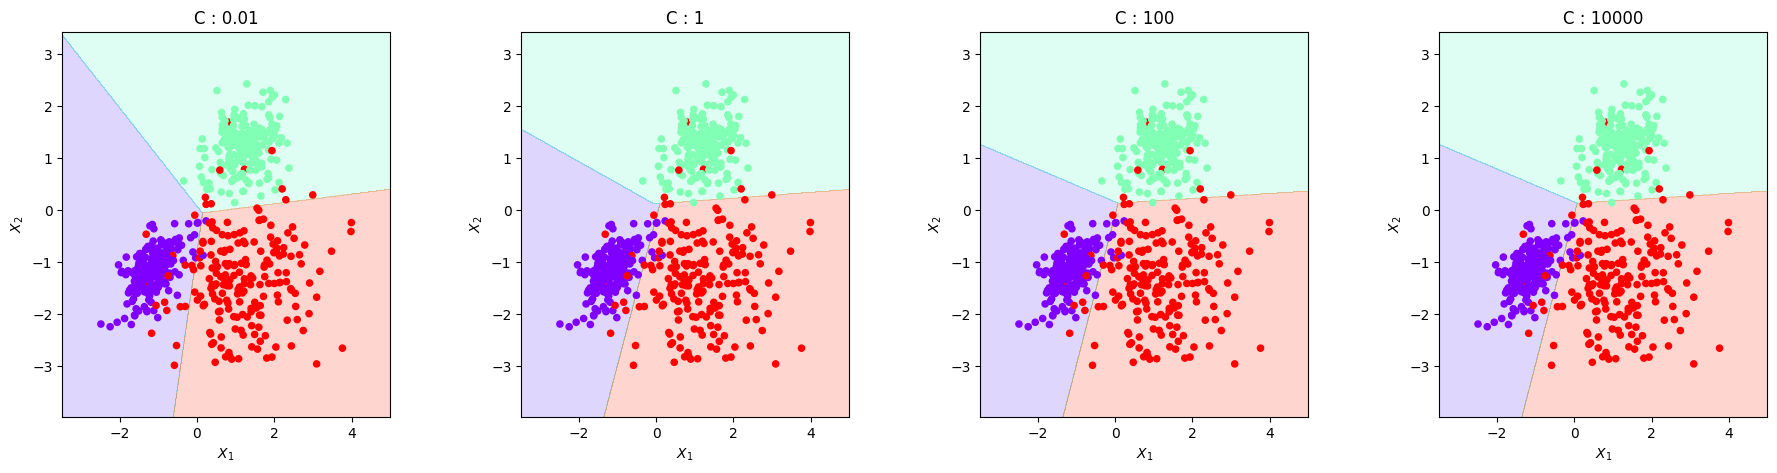

In [14]:
plt.figure(figsize=(22, 5)) 
for i, C in enumerate([0.01, 1, 100, 10000]):
        svc = svm.SVC(kernel='linear', C=C).fit(X, y) 
        plt.subplot(1, 4, i+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")

Linear Kernel을 사용한 경우 약간의 차이는 있지만, 큰 차이는 나지 않는 것을 확인할 수 있습니다. 

### Polynomial

Polynomial의  $\gamma$의 경우 따로 설정해주지 않을 경우 (1 / feature의 갯수)로 결정됩니다.  
Polynomial에만 존재하는 하이퍼 파라미터인 degree의 영향력을 살펴보기 위해, $\gamma$는 기본 값으로 고정 시켰습니다.  
또한 coef0의 경우 일반적으로 잘 조정하지 않는 하이퍼 파라미터이므로 생략했습니다.

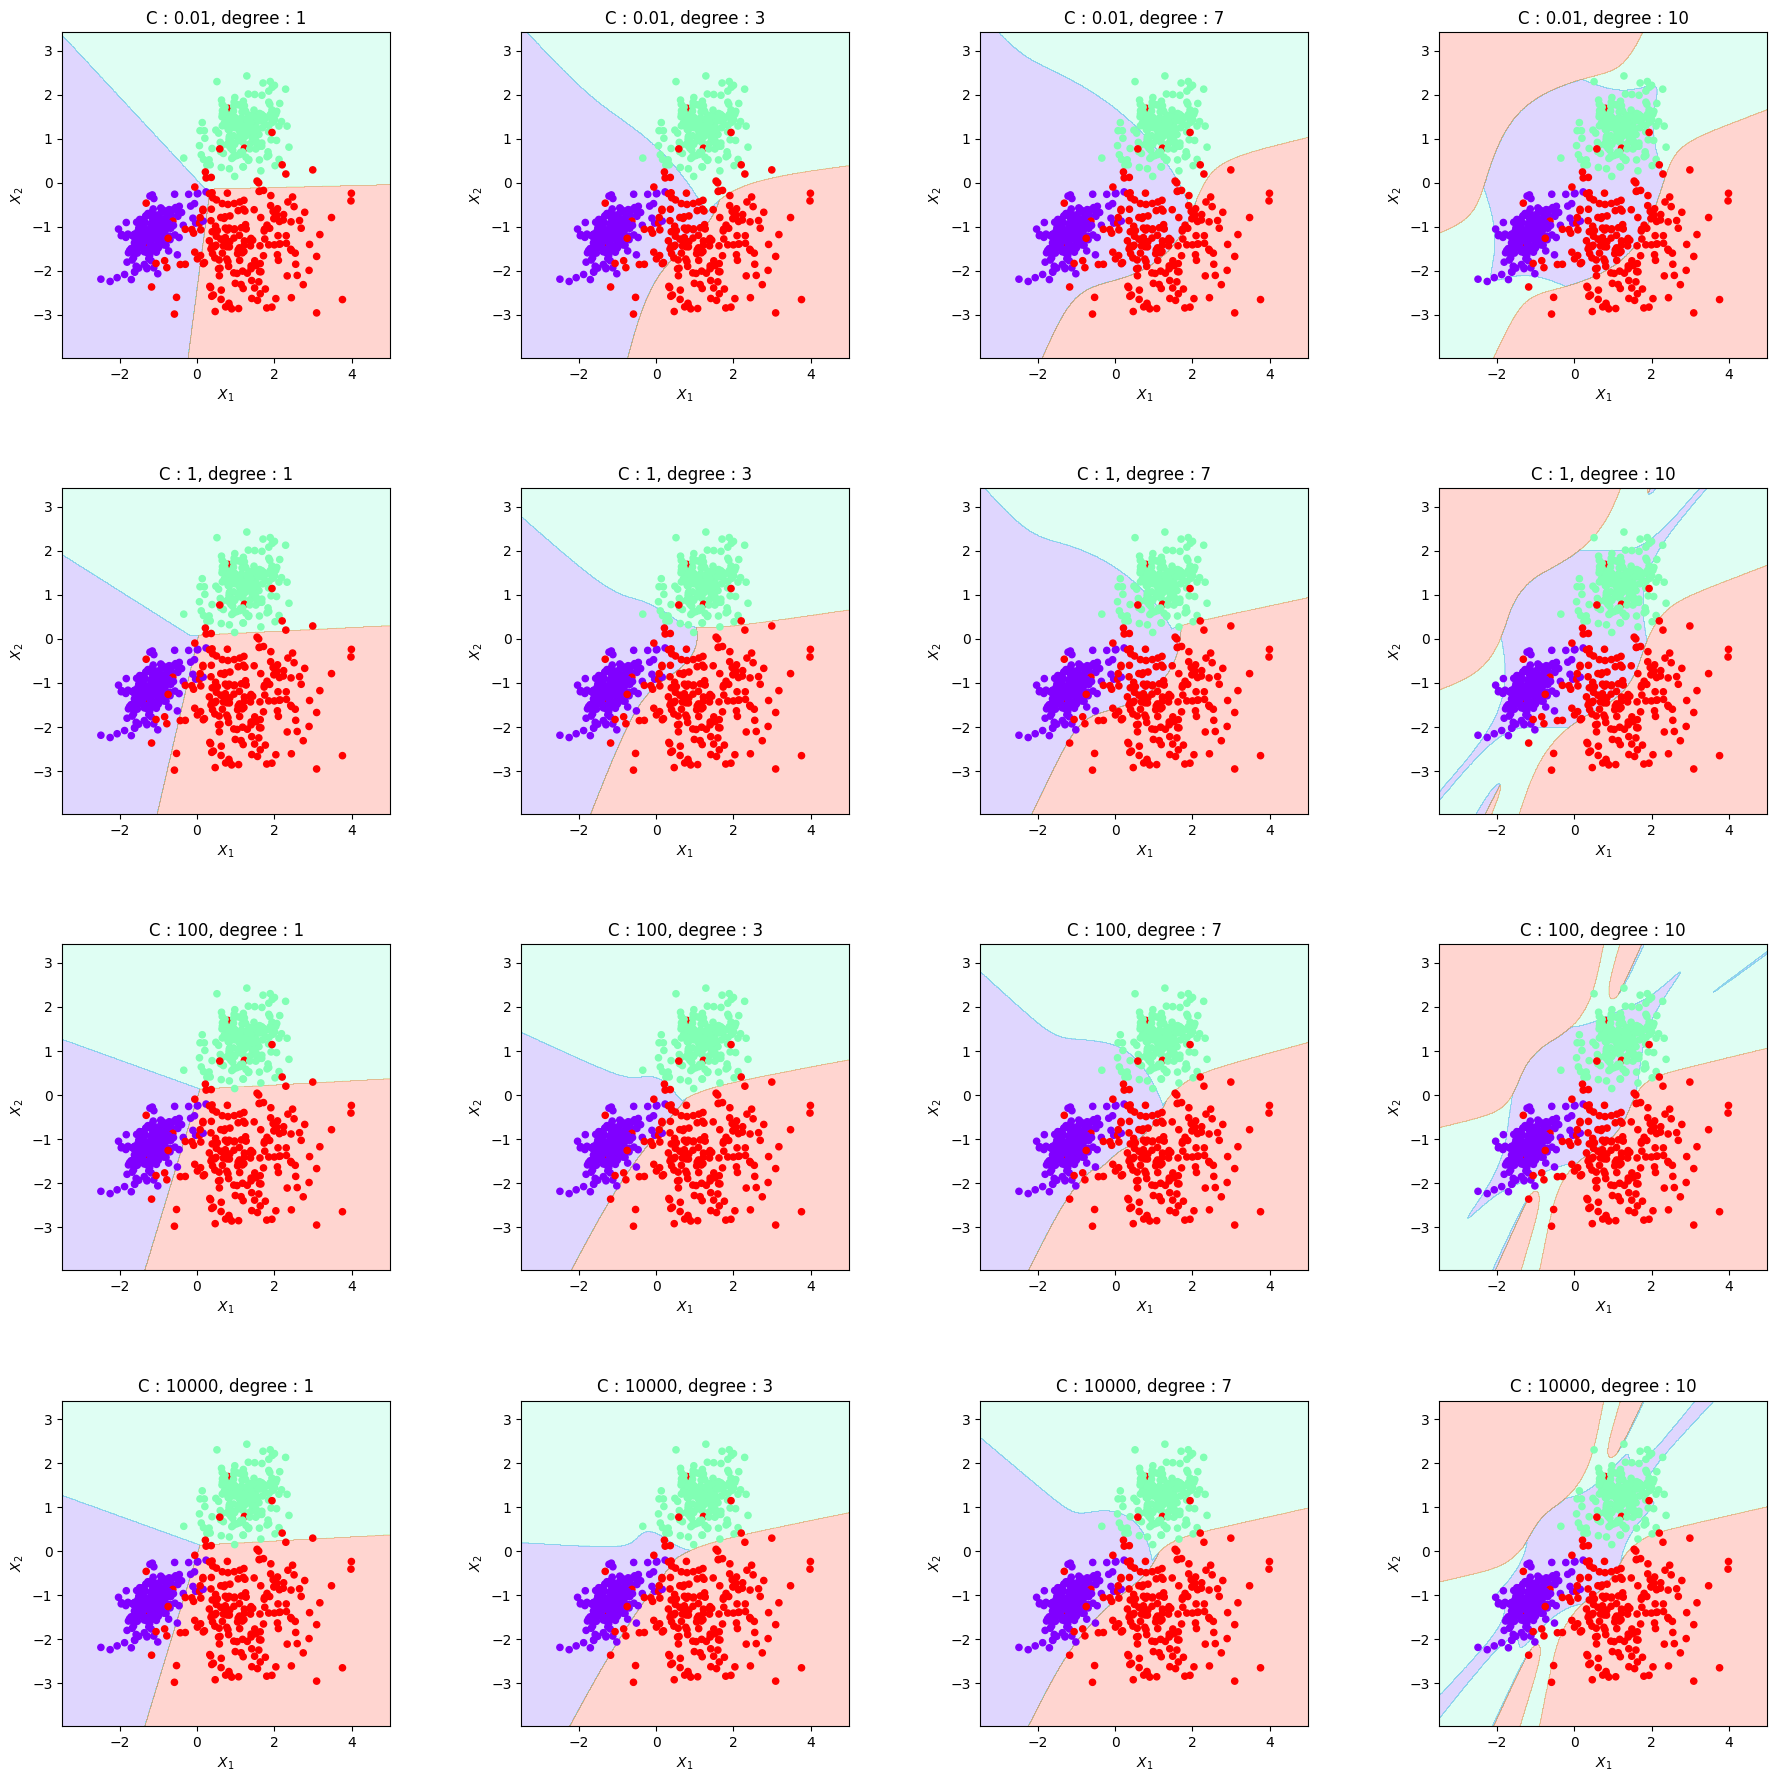

In [15]:
plt.figure(figsize=(22, 22)) 
for i, C in enumerate([0.01, 1, 100, 10000]):
    for j, degree in enumerate([1, 3, 7, 10]):
        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X, y) 
        plt.subplot(4, 4, (i*4)+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}, degree : {degree}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")


결과를 살펴보면, degree가 1인 경우에는 Linear Kernel과 거의 같은 분류 경계면을 형성하고 있습니다.  
식을 살펴보면 $K(X_i, X_j) = (\gamma {X_i}^T \cdot X_j + \text{coef0})^{\text{degree}}$ 인데, 여기서 $\text{degree} = 1$로 두면 $\gamma {X_i}^T \cdot X_j + \text{coef0}$가 됩니다.  
따라서 계산 결과는 고차원으로 맵핑 되지는 않으므로 Linear Kernel과 비슷해집니다.

**degree**가 너무 높게 설정 될 경우 직관적이지 않은 모양의 분류 경계면이 형성되는데, 데이터를 잘 표현하고 있다고 보기는 힘든 결과입니다.  
과적합 뿐만 아니라, 훈련에 활용된 데이터도 잘 분류하지 못 하는 모습을 보입니다.  
따라서 무조건 높은 차원의 다항식에 맵핑시킨다고 해서 좋은 성능을 보이지는 않을 것이라고 추측 할 수 있습니다.

**C**는 앞서 설명한 대로 높으면 높을수록 결정 경계면이 더 구불해지는 모습을 확인해줄 수 있습니다.

### rbf

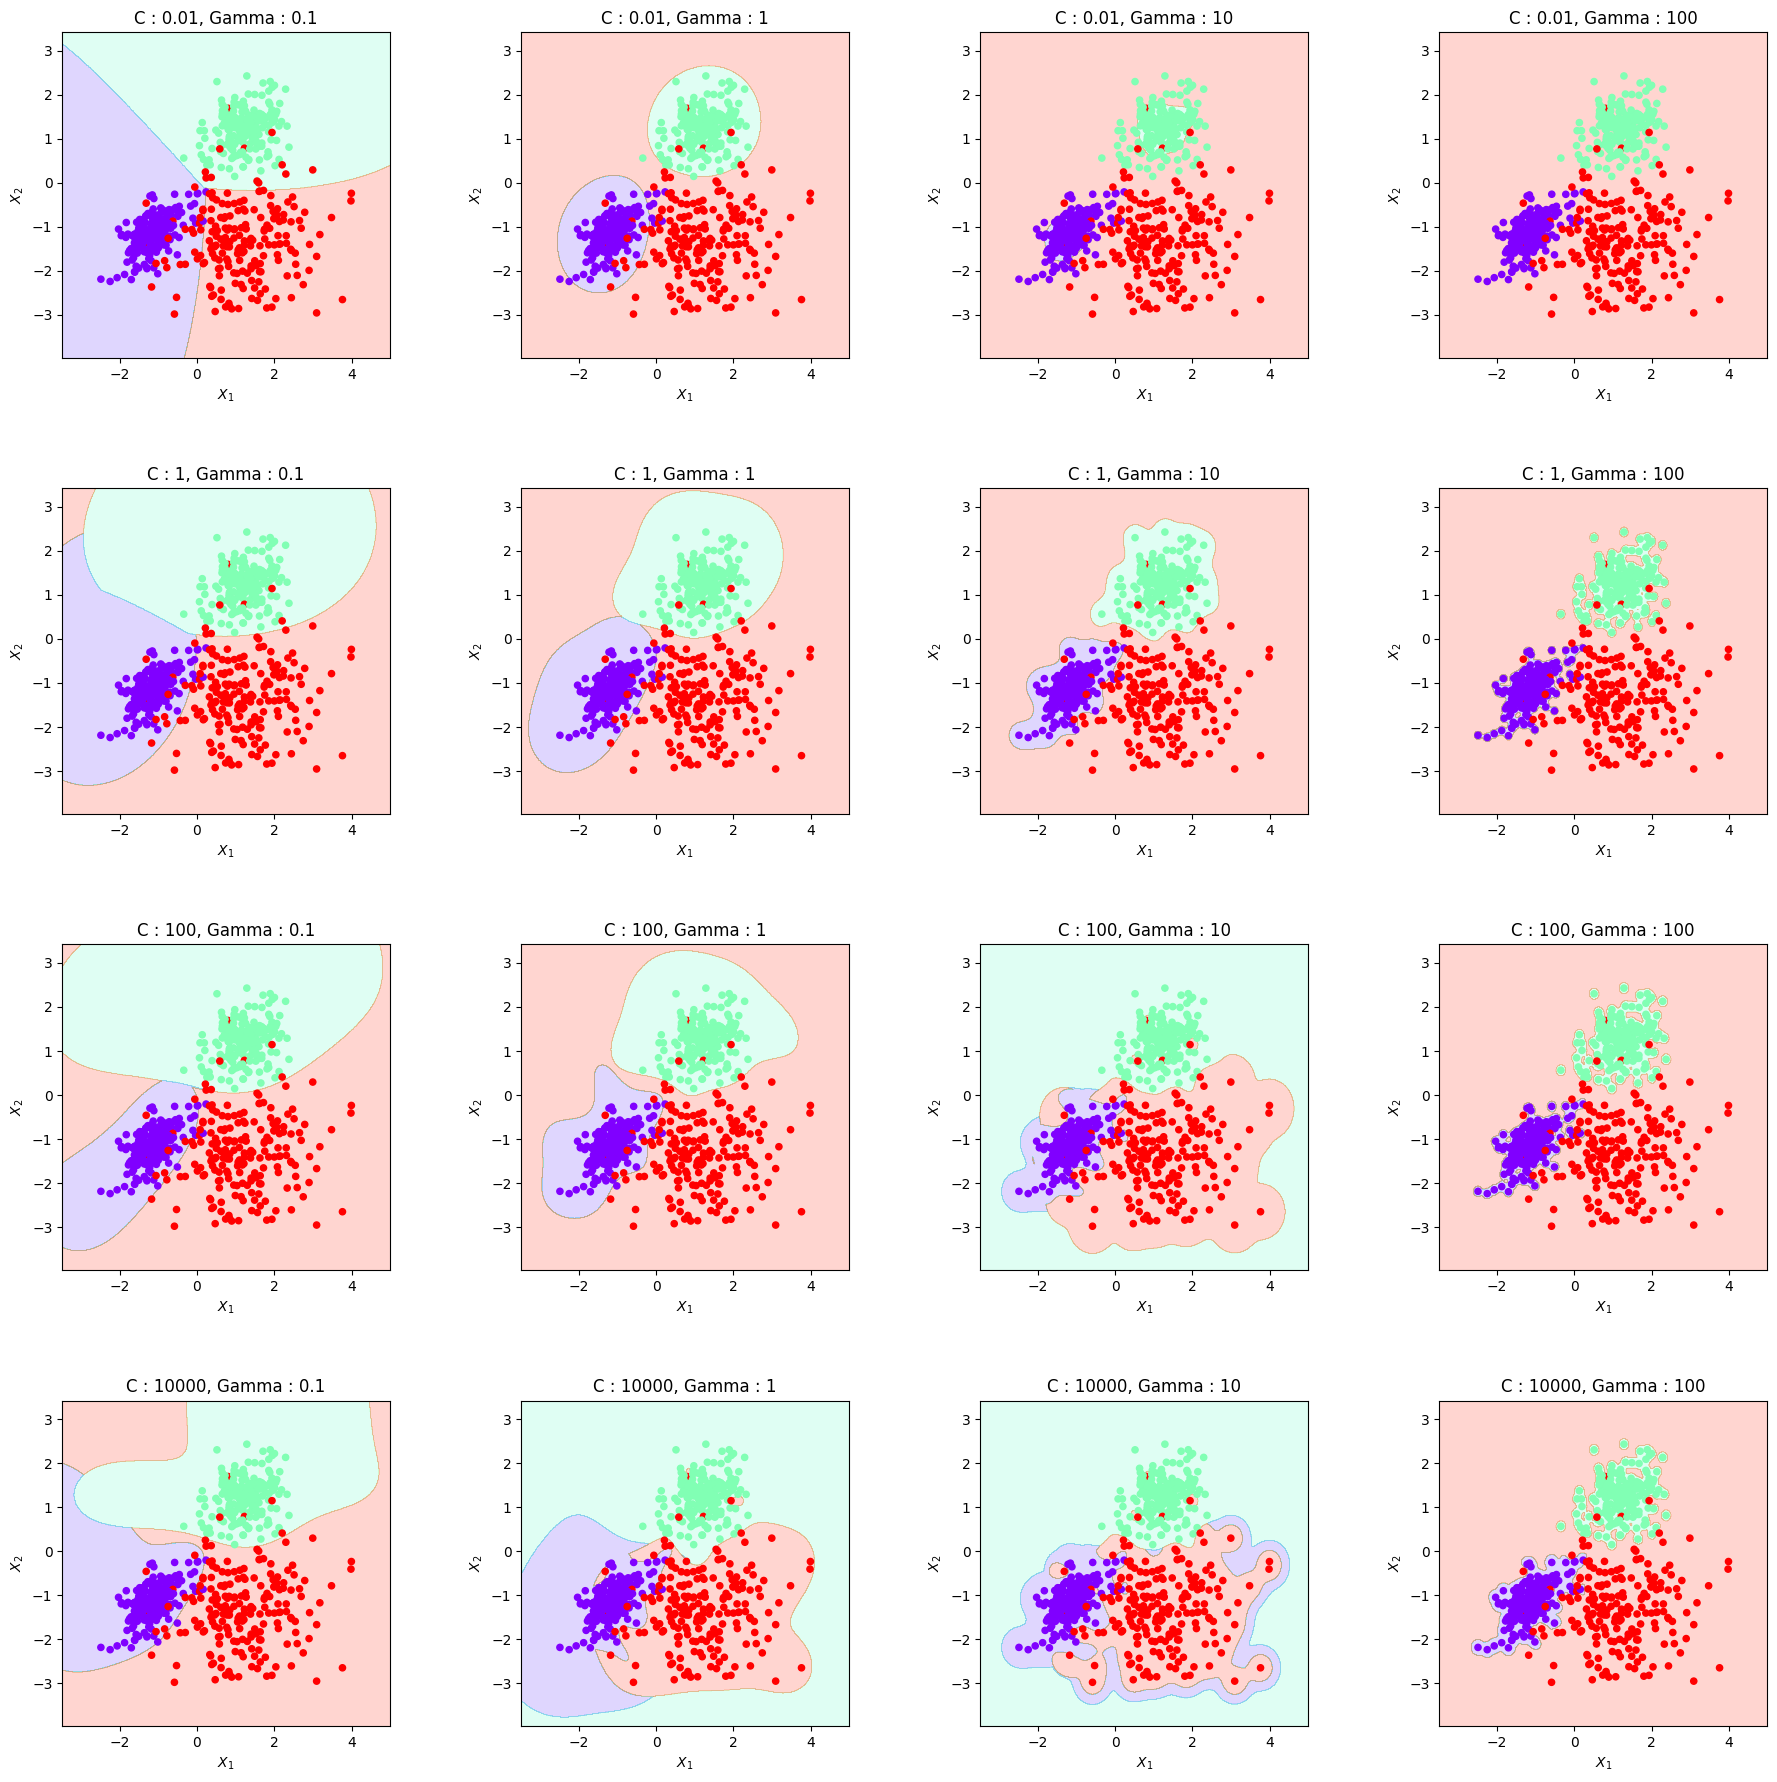

In [16]:
plt.figure(figsize=(22, 22)) 
for i, C in enumerate([0.01, 1, 100, 10000]):
    for j, gamma in enumerate([0.1, 1, 10, 100]):
        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X, y) 
        plt.subplot(4, 4, (i*4)+j+1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.title(f"C : {C}, Gamma : {gamma}")
        plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.2)
        plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=20, cmap=plt.cm.rainbow)
        plt.xlabel("$X_1$")
        plt.ylabel("$X_2$")


$\gamma$의 경우 앞서 설명한 대로 값이 크면 클수록 각 데이터 포인트가 결정 경계면에 영향을 주는 거리가 줄어들게 됩니다. 따라서 $\gamma$가 높으면 높을수록 훈련 데이터의 포인트가 존재하는 좁은 범위에만 영역을 그리게 되어 과적합 위험이 크다는 점을 알 수 있습니다.

**C**의 경우 클수록 경계면을 데이터 포인트에 따라 더 구불구불하게 그리고 있는 모습을 볼 수 있습니다. 마찬가지로 지나치게 높을 경우 과적합의 위험이 있을 것으로 예상할 수 있습니다.

**중요한 점은,** 많은 경우 분포가 더 넓게 퍼져있는 빨간색 클래스의 영역이 대부분인데 반해, 초록색 클래스의 영역이 대부분을 차지하는 경우도 있는 것을 확인할 수 있습니다.  
이처럼 하이퍼 파라미터의 조합에 따라 전혀 다른 결과를 가져올 수 있으므로 튜닝이 중요하다는 점을 확인할 수 있습니다.

## Application on Benchmark Dataset

이제 공개된 벤치마크 데이터셋에 적용해보도록 하겠습니다. 데이터는 Breast Cancer Wisconsin (Diagnostic) Data Set 을 사용하였습니다. 종양의 여러 속성을 설명 변수로 가지고 있으며, 해당 종양이 악성인지 양성인지를 분류하는 것이 목적입니다.  
다양한 커널 및 하이퍼파라미터의 조합을 활용하여 성능이 어떻게 달라지는지 살펴보도록 하겠습니다.


데이터 출처 : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### 데이터셋 준비

In [17]:
df = pd.read_csv('data/data.csv')

In [18]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [19]:
df.isnull().all()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

데이터에 결측치는 존재하지 않으므로 별다른 전처리는 필요하지 않을 것으로 보입니다.

In [20]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]
y.replace(['M','B'], [0,1], inplace=True) # M : 양성종양, B : 악성종양

In [21]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

데이터의 갯수는 양성과 악성이 각각 212개, 357개로 불균형이 심하지는 않습니다.

### 실험 진행

In [22]:
columns = ['kernel','C','degree','Gamma','Accuracy','F1 score', 'Time(ms)']
results = pd.DataFrame(columns=columns)

In [23]:
for random_state in [0,1,2,3,4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # rbf
    for C in [0.01, 0.1, 1, 10, 100]:
        for gamma in [0.01, 0.1, 1, 10, 100]:
            start = time.time()
            rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X_train, y_train)
            y_pred = rbf_svc.predict(X_test)
            end = round((time.time() - start)*1000, 3)

            result = ['rbf',C,'-',gamma,accuracy_score(y_test, y_pred),f1_score(y_test, y_pred), end]
            results.loc[len(results)] = result

    # polynomial
    for C in [0.01, 0.1, 1, 10, 100]:
        for degree in [1, 2, 3, 7, 10, 20]:
            start = time.time()
            poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(X_train, y_train)
            y_pred = poly_svc.predict(X_test)
            end = round((time.time() - start)*1000, 3)

            result = ['poly',C,degree,'-',accuracy_score(y_test, y_pred),f1_score(y_test, y_pred), end]
            results.loc[len(results)] = result

    # linear
    for C in [0.01, 0.1, 1, 10, 100]:
            start = time.time()
            linear_svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
            y_pred = rbf_svc.predict(X_test)
            end = round((time.time() - start)*1000, 3)

            result = ['linear',C,'-','-',accuracy_score(y_test, y_pred),f1_score(y_test, y_pred), end]
            results.loc[len(results)] = result

훈련:테스트 비율을 3:1로 설정했으며, random seed를 다르게 설정하여 실험을 5번 진행했습니다.

또한 Kernel은 RBF, Polynomial, Linear 3가지를 시도했으며 C와 $\gamma$(RBF) 및 degree(Polynomial)을 바꿔가며 진행했습니다. 

Polynomial Kernel의 경우 $\gamma$는 위와 마찬가지로 default 값으로 고정했습니다. (1 / feature 갯수)

성능 측정 지표는 Accuracy 및 F1 Score를 선택 하였습니다.

In [24]:
result_df = results.groupby(['kernel','C','degree','Gamma']).agg(['mean','std'])

In [25]:
result_df

Accuracy            F1 score           Time(ms)  \
                                mean       std      mean       std     mean   
kernel C      degree Gamma                                                    
linear 0.01   -      -      0.629371  0.021554  0.772362  0.016079  10.6928   
       0.10   -      -      0.629371  0.021554  0.772362  0.016079  10.6228   
       1.00   -      -      0.629371  0.021554  0.772362  0.016079  11.1640   
       10.00  -      -      0.629371  0.021554  0.772362  0.016079  12.3348   
       100.00 -      -      0.629371  0.021554  0.772362  0.016079  18.2884   
poly   0.01   1      -      0.868531  0.043221  0.905600  0.030241   7.1444   
              2      -      0.662937  0.029002  0.788671  0.019300   8.3300   
              3      -      0.707692  0.041194  0.811614  0.025302   7.1282   
              7      -      0.711888  0.044886  0.813525  0.027375   6.9084   
              10     -      0.704895  0.039373  0.808503  0.023466   8.3362   
              20     -      0.724476  0.044393  0.819103  0.025447   8.9992   
       0.10   1      -      0.959441  0.011491  0.968603  0.009139   4.1218   
              2      -      0.744056  0.052471  0.831408  0.031539   7.8604   
              3      -      0.832168  0.044228  0.882716  0.028674   5.8244   
              7      -      0.756643  0.047788  0.837437  0.028833   5.9890   
              10     -      0.738462  0.047583  0.827390  0.027734   8.5292   
              20     -      0.728671  0.047015  0.821428  0.027042   9.4188   
       1.00   1      -      0.967832  0.006255  0.974724  0.005095   3.1996   
              2      -      0.822378  0.030722  0.873978  0.020937   7.3936   
              3      -      0.913287  0.022981  0.935379  0.017583   4.4652   
              7      -      0.809790  0.041489  0.868676  0.026932   5.1460   
              10     -      0.756643  0.044613  0.836523  0.026581   8.5504   
              20     -      0.735664  0.045428  0.824127  0.027176   9.3424   
       10.00  1      -      0.974825  0.010605  0.979992  0.008553   3.0002   
              2      -      0.872727  0.018764  0.905160  0.013516   8.6904   
              3      -      0.955245  0.016841  0.965297  0.013173   3.7994   
              7      -      0.841958  0.043839  0.887977  0.029738   5.2512   
              10     -      0.774825  0.035451  0.842334  0.021254   8.7572   
              20     -      0.746853  0.039061  0.828317  0.023631   9.9756   
       100.00 1      -      0.967832  0.010605  0.974232  0.008594   4.4414   
              2      -      0.855944  0.020745  0.887724  0.017804  15.4780   
              3      -      0.958042  0.016400  0.966956  0.012888   3.6892   
              7      -      0.879720  0.017412  0.911679  0.012674   4.3728   
              10     -      0.776224  0.028406  0.838366  0.019888   9.7586   
              20     -      0.749650  0.035794  0.825793  0.023230   9.7860   
rbf    0.01   -      0.01   0.629371  0.021554  0.772362  0.016079  13.6614   
                     0.1    0.629371  0.021554  0.772362  0.016079  13.2818   
                     1.0    0.629371  0.021554  0.772362  0.016079  17.9374   
                     10.0   0.629371  0.021554  0.772362  0.016079  22.0736   
                     100.0  0.629371  0.021554  0.772362  0.016079  23.1562   
       0.10   -      0.01   0.951049  0.012112  0.961921  0.009954   8.7836   
                     0.1    0.934266  0.013632  0.947863  0.010639  11.2272   
                     1.0    0.629371  0.021554  0.772362  0.016079  18.1232   
                     10.0   0.629371  0.021554  0.772362  0.016079  21.1744   
                     100.0  0.629371  0.021554  0.772362  0.016079  23.9576   
       1.00   -      0.01   0.970629  0.011491  0.976971  0.008970   5.3898   
                     0.1    0.952448  0.003127  0.961651  0.003282   8.9406   
                     1.0    0.632168  0.024525  0.773702  0.017490  18.6998   

실험 결과는 위와 같습니다. 각각 하이퍼파라미터 셋팅마다 5회 평균 및 편차, 그리고 각 모델의 학습 및 추론 시간을 정리했습니다.

In [26]:
result_df.reset_index(level=[0,1,2,3]).sort_values(by=('F1 score', 'mean'), ascending=False)

kernel       C degree  Gamma  Accuracy            F1 score            \
                                      mean       std      mean       std   
23    poly   10.00      1      -  0.974825  0.010605  0.979992  0.008553   
50     rbf   10.00      -   0.01  0.973427  0.010372  0.978899  0.008263   
45     rbf    1.00      -   0.01  0.970629  0.011491  0.976971  0.008970   
17    poly    1.00      1      -  0.967832  0.006255  0.974724  0.005095   
29    poly  100.00      1      -  0.967832  0.010605  0.974232  0.008594   
55     rbf  100.00      -   0.01  0.965035  0.017829  0.971475  0.015845   
11    poly    0.10      1      -  0.959441  0.011491  0.968603  0.009139   
31    poly  100.00      3      -  0.958042  0.016400  0.966956  0.012888   
25    poly   10.00      3      -  0.955245  0.016841  0.965297  0.013173   
40     rbf    0.10      -   0.01  0.951049  0.012112  0.961921  0.009954   
46     rbf    1.00      -    0.1  0.952448  0.003127  0.961651  0.003282   
51     rbf   10.00      -    0.1  0.942657  0.018101  0.952947  0.016252   
56     rbf  100.00      -    0.1  0.941259  0.018894  0.951844  0.016789   
41     rbf    0.10      -    0.1  0.934266  0.013632  0.947863  0.010639   
19    poly    1.00      3      -  0.913287  0.022981  0.935379  0.017583   
32    poly  100.00      7      -  0.879720  0.017412  0.911679  0.012674   
5     poly    0.01      1      -  0.868531  0.043221  0.905600  0.030241   
24    poly   10.00      2      -  0.872727  0.018764  0.905160  0.013516   
26    poly   10.00      7      -  0.841958  0.043839  0.887977  0.029738   
30    poly  100.00      2      -  0.855944  0.020745  0.887724  0.017804   
13    poly    0.10      3      -  0.832168  0.044228  0.882716  0.028674   
18    poly    1.00      2      -  0.822378  0.030722  0.873978  0.020937   
20    poly    1.00      7      -  0.809790  0.041489  0.868676  0.026932   
27    poly   10.00     10      -  0.774825  0.035451  0.842334  0.021254   
33    poly  100.00     10      -  0.776224  0.028406  0.838366  0.019888   
14    poly    0.10      7      -  0.756643  0.047788  0.837437  0.028833   
21    poly    1.00     10      -  0.756643  0.044613  0.836523  0.026581   
12    poly    0.10      2      -  0.744056  0.052471  0.831408  0.031539   
28    poly   10.00     20      -  0.746853  0.039061  0.828317  0.023631   
15    poly    0.10     10      -  0.738462  0.047583  0.827390  0.027734   
34    poly  100.00     20      -  0.749650  0.035794  0.825793  0.023230   
22    poly    1.00     20      -  0.735664  0.045428  0.824127  0.027176   
16    poly    0.10     20      -  0.728671  0.047015  0.821428  0.027042   
10    poly    0.01     20      -  0.724476  0.044393  0.819103  0.025447   
8     poly    0.01      7      -  0.711888  0.044886  0.813525  0.027375   
7     poly    0.01      3      -  0.707692  0.041194  0.811614  0.025302   
9     poly    0.01     10      -  0.704895  0.039373  0.808503  0.023466   
6     poly    0.01      2      -  0.662937  0.029002  0.788671  0.019300   
57     rbf  100.00      -    1.0  0.634965  0.027709  0.775053  0.018986   
52     rbf   10.00      -    1.0  0.634965  0.027709  0.775053  0.018986   
47     rbf    1.00      -    1.0  0.632168  0.024525  0.773702  0.017490   
58     rbf  100.00      -   10.0  0.629371  0.021554  0.772362  0.016079   
53     rbf   10.00      -   10.0  0.629371  0.021554  0.772362  0.016079   
49     rbf    1.00      -  100.0  0.629371  0.021554  0.772362  0.016079   
48     rbf    1.00      -   10.0  0.629371  0.021554  0.772362  0.016079   
54     rbf   10.00      -  100.0  0.629371  0.021554  0.772362  0.016079   
0   linear    0.01      -      -  0.629371  0.021554  0.772362  0.016079   
44     rbf    0.10      -  100.0  0.629371  0.021554  0.772362  0.016079   
43     rbf    0.10      -   10.0  0.629371  0.021554  0.772362  0.016079   
42     rbf    0.10      -    1.0  0.629371  0.021554  0.772362  0.016079   
39     rbf    0.01      -  100.0  0.629371  0.021554

실험 결과를 F1 Score를 기준으로 정렬한 결과입니다. Linear Kernel의 경우 가장 낮은 성능을 보였으며, 다른 Kernel에서 성능이 아무리 낮아도 Linear Kernel 성능과 같거나 높은 모습을 보이고 있습니다.

예상외의 결과로 Polynomial Kernel을 사용했을 때 degree=1로 설정한 경우가 가장 좋은 성능을 보였습니다. 

앞서 Polynimoal Kernel에서 Degree=1로 설정할 경우 $\gamma X_i \cdot X_j + \text{coef0}$로 표현이 가능하며, $\gamma$로 표현되는 스케일과 coef0에서만 차이가 있고, Linear Kernel ($X_i \cdot X_j$)과 거의 같은 형태의 결정 경계를 가지는 것을 확인한 것과는 매우 상반된 결과입니다.

다만 데이터의 특성으로 인한 것으로, 본 데이터는 설명 변수가 30개이며 목표 변수를 분류하기 위해 더 많은 차원이 필요하지는 않은 데이터이기 때문에 이런 결과가 나타는 것으로 보입니다.

# Conclusion

* RBF Kernel이 일반적으로 더 높은 차원의 표현이 가능하지만, 항상 최고의 성능을 보여주지는 않으므로 데이터의 속성에 따라 주의깊게 사용 할 필요가 있습니다. 특히 선형으로도 좋은 성능의 분류가 가능할 정도의 데이터라면 오히려 일반화 성능이 떨어지는 결과를 가져올 수 있습니다.
* Hyperparameter에 따라 성능 차이가 민감하게 변화하므로 많은 Hyperparameter를 시도해 볼 필요가 있습니다. 위 데이터의 경우 같은 RBF Kernel에서도 F1 Score 기준으로 최대 0.98에서 최소 0.77까지 매우 큰 차이를 보였습니다.
* RBF Kernel을 사용하는 경우 학습 시간이 대체로 더 오래 걸립니다. 또한 RBF Kernel에서 $\gamma$는 높을수록 학습 시간이 더 오래 걸리며, $\gamma$가 낮은 경우에는 C가 낮을 수록 더 오래 걸렸습니다.